Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

bookings = pd.read_csv('/content/hotel_bookings.csv')
bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [2]:
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [3]:
# count null records
bookings.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [4]:
# cleaning up null values

# drop the company column
bookings.drop('company', axis=1, inplace=True)

# drop the rows with null values
bookings.dropna(inplace=True)

# show info
bookings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102894 entries, 3 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           102894 non-null  object 
 1   is_canceled                     102894 non-null  int64  
 2   lead_time                       102894 non-null  int64  
 3   arrival_date_year               102894 non-null  int64  
 4   arrival_date_month              102894 non-null  object 
 5   arrival_date_week_number        102894 non-null  int64  
 6   arrival_date_day_of_month       102894 non-null  int64  
 7   stays_in_weekend_nights         102894 non-null  int64  
 8   stays_in_week_nights            102894 non-null  int64  
 9   adults                          102894 non-null  int64  
 10  children                        102894 non-null  float64
 11  babies                          102894 non-null  int64  
 12  meal                 

Collect all columns that are not numbers

In [5]:
# show all columns that are objects (not int or float)
object_columns = bookings.select_dtypes(include=['object']).columns
object_columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

Print unique values for all data types that are not numbers

In [6]:
# loops through object columns ant print unique values for them
for col in object_columns:
  print(f'{col}: {bookings[col].unique()}')

hotel: ['Resort Hotel' 'City Hotel']
arrival_date_month: ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
meal: ['BB' 'FB' 'HB' 'SC' 'Undefined']
country: ['GBR' 'PRT' 'USA' 'ESP' 'IRL' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU' 'FRA'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE' 'BRA'
 'FIN' 'MOZ' 'BWA' 'LUX' 'NLD' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'CYM' 'ZMB' 'ZWE'
 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV' 'HKG' 'ISR' 'IRN' 'GEO'
 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT' 'NGA' 'MDV' 'VEN'
 'SVK' 'AGO' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC' 'AZE' 'BHR'
 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR' 'MUS' 'COM'
 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI' 'SAU' 'VNM' 'PLW' 'QAT'
 'EGY' 'PER' 'MLT' 'MWI' 'ISL' 'ECU' 'NPL' 'CPV' 'BHS' 'MAC' 'TGO' 'TWN'
 'DJI' 'KNA' 'ETH' 'IRQ' 'HND' 'RWA' 'KHM' 'MCO' 'BG

Starting with Undefined meals, delete those rows

In [7]:
# count rows with undefined meals
len(bookings[bookings['meal'] == 'Undefined'])

830

In [8]:
# drop rows with undefined meals
bookings.drop(bookings[bookings['meal'] == 'Undefined'].index, inplace=True)

# recount to double check these rows
len(bookings[bookings['meal'] == 'Undefined'])

0

Convert reservation_status_date into separate columns for year, month, day

In [9]:
# converting dates into seprate year, month, day
bookings['reservation_status_date'] = pd.to_datetime(bookings['reservation_status_date'])
bookings['reservation_year'] = bookings['reservation_status_date'].dt.year
bookings['reservation_month'] = bookings['reservation_status_date'].dt.month
bookings['reservation_day'] = bookings['reservation_status_date'].dt.day

# drop reservation_status_data column
bookings.drop('reservation_status_date', axis=1, inplace=True)

# show head
bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_year,reservation_month,reservation_day
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,0,Transient,75.0,0,0,Check-Out,2015,7,2
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,0,Transient,98.0,0,1,Check-Out,2015,7,3
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,0,Transient,98.0,0,1,Check-Out,2015,7,3
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,303.0,0,Transient,103.0,0,1,Check-Out,2015,7,3
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,240.0,0,Transient,82.0,0,1,Canceled,2015,5,6


Convert other object columns into numberical data

In [10]:
# hotel
bookings['hotel'] = bookings['hotel'].map({'Resort Hotel': 0, 'City Hotel': 1})

# arrival_date_month
bookings['arrival_date_month'] = bookings['arrival_date_month'].map({'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6,
                                                                     'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12})

# meal
bookings['meal'] = bookings['meal'].map({'BB':0, 'FB':1, 'HB':2, 'SC':3})

# country using enumerate function
country_dict = {}
for i, country in enumerate(bookings['country'].unique()):
  country_dict[country] = i

bookings['country'] = bookings['country'].map(country_dict)

# market segment
bookings['market_segment'] = bookings['market_segment'].map({'Corporate': 0, 'Online TA': 1, 'Direct': 2, 'Offline TA/TO': 3, 'Groups': 4, 'Complementary': 5, 'Aviation': 6})

# distribution channel
bookings['distribution_channel'] = bookings['distribution_channel'].map({'Direct':0, 'Corporate':1, 'TA/TO':2, 'GDS':3})

# reserved_room_type
bookings['reserved_room_type'] = bookings['reserved_room_type'].map({'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'H':7,})

# assigned_room_type
bookings['assigned_room_type'] = bookings['assigned_room_type'].map({'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'H':7, 'I':8, 'K':9})

# deposit_type
bookings['deposit_type'] = bookings['deposit_type'].map({'No Deposit':0, 'Non Refund':1, 'Refundable':2})

# customer_type
bookings['customer_type'] = bookings['customer_type'].map({'Transient':0, 'Contract':1, 'Transient-Party':2, 'Group':3})

# reservation_status
bookings['reservation_status'] = bookings['reservation_status'].map({'Canceled':0, 'Check-Out':1, 'No-Show':2})

# show info
bookings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102064 entries, 3 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           102064 non-null  int64  
 1   is_canceled                     102064 non-null  int64  
 2   lead_time                       102064 non-null  int64  
 3   arrival_date_year               102064 non-null  int64  
 4   arrival_date_month              102064 non-null  int64  
 5   arrival_date_week_number        102064 non-null  int64  
 6   arrival_date_day_of_month       102064 non-null  int64  
 7   stays_in_weekend_nights         102064 non-null  int64  
 8   stays_in_week_nights            102064 non-null  int64  
 9   adults                          102064 non-null  int64  
 10  children                        102064 non-null  float64
 11  babies                          102064 non-null  int64  
 12  meal                 

Country key

In [11]:
# print dictionary
country_dict.items()

dict_items([('GBR', 0), ('PRT', 1), ('USA', 2), ('ESP', 3), ('IRL', 4), ('ROU', 5), ('NOR', 6), ('OMN', 7), ('ARG', 8), ('POL', 9), ('DEU', 10), ('FRA', 11), ('BEL', 12), ('CHE', 13), ('CN', 14), ('GRC', 15), ('ITA', 16), ('DNK', 17), ('RUS', 18), ('SWE', 19), ('AUS', 20), ('EST', 21), ('CZE', 22), ('BRA', 23), ('FIN', 24), ('MOZ', 25), ('BWA', 26), ('LUX', 27), ('NLD', 28), ('SVN', 29), ('ALB', 30), ('IND', 31), ('CHN', 32), ('MEX', 33), ('MAR', 34), ('UKR', 35), ('LVA', 36), ('PRI', 37), ('SRB', 38), ('CHL', 39), ('AUT', 40), ('BLR', 41), ('LTU', 42), ('TUR', 43), ('ZAF', 44), ('CYM', 45), ('ZMB', 46), ('ZWE', 47), ('DZA', 48), ('KOR', 49), ('CRI', 50), ('HUN', 51), ('ARE', 52), ('TUN', 53), ('JAM', 54), ('HRV', 55), ('HKG', 56), ('ISR', 57), ('IRN', 58), ('GEO', 59), ('AND', 60), ('GIB', 61), ('URY', 62), ('JEY', 63), ('CAF', 64), ('CYP', 65), ('COL', 66), ('GGY', 67), ('KWT', 68), ('NGA', 69), ('MDV', 70), ('VEN', 71), ('SVK', 72), ('AGO', 73), ('FJI', 74), ('KAZ', 75), ('PAK', 76)

Gather results from this code

In [12]:
bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_year,reservation_month,reservation_day
3,0,0,13,2015,7,27,1,0,1,1,...,304.0,0,0,75.0,0,0,1,2015,7,2
4,0,0,14,2015,7,27,1,0,2,2,...,240.0,0,0,98.0,0,1,1,2015,7,3
5,0,0,14,2015,7,27,1,0,2,2,...,240.0,0,0,98.0,0,1,1,2015,7,3
7,0,0,9,2015,7,27,1,0,2,2,...,303.0,0,0,103.0,0,1,1,2015,7,3
8,0,1,85,2015,7,27,1,0,3,2,...,240.0,0,0,82.0,0,1,0,2015,5,6


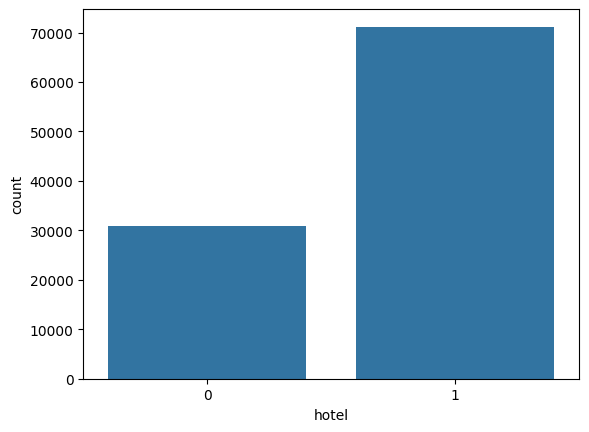

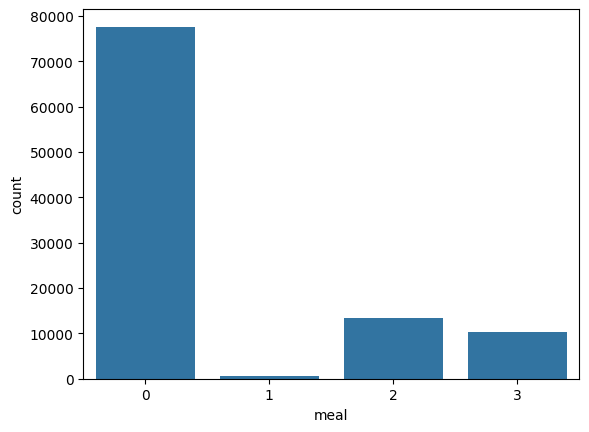

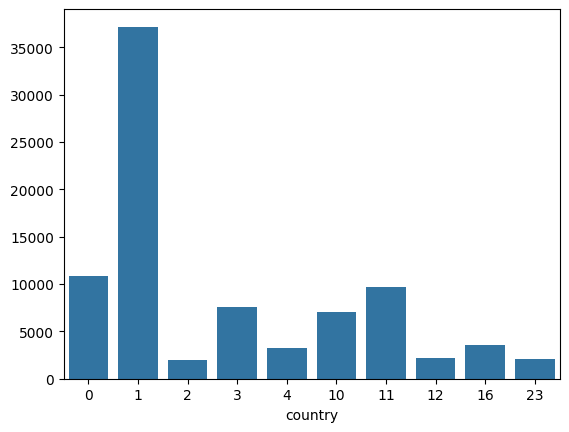

In [13]:
# display different graphs

# bar plot for hotel type ('Resort Hotel': 0, 'City Hotel': 1)
sns.countplot(x='hotel', data=bookings)
plt.show()

# bar plot for meal type ('BB':0, 'FB':1, 'HB':2, 'SC':3)
# (BB - bed and breakfast (breakfast in room rate), FB - full board (3 meals in room rate), HB - half board (2 meals in room rate), SC - self catering (no meals included))
sns.countplot(x='meal', data=bookings)
plt.show()

# bar plot for top 10 countries ('GBR', 0)('PRT', 1)('USA', 2)('ESP', 3)('IRL', 4)('DEU', 10)('FRA', 11)('BEL', 12)('ITA', 16)('BRA', 23)
top_countries = bookings['country'].value_counts().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.show()


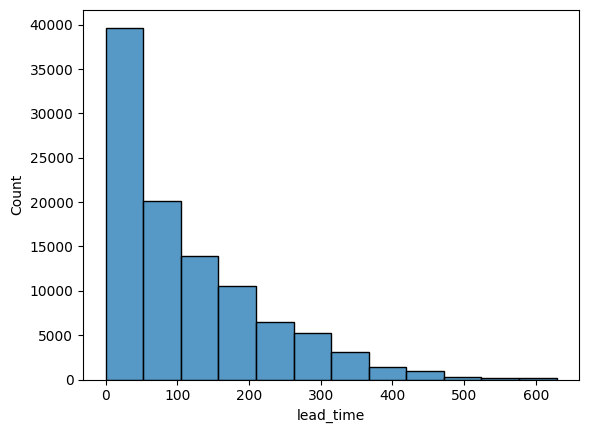

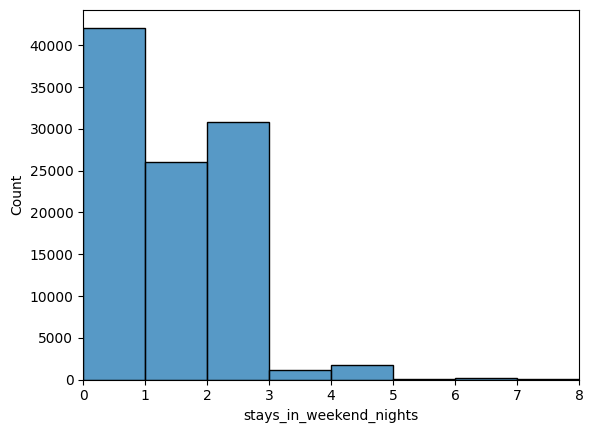

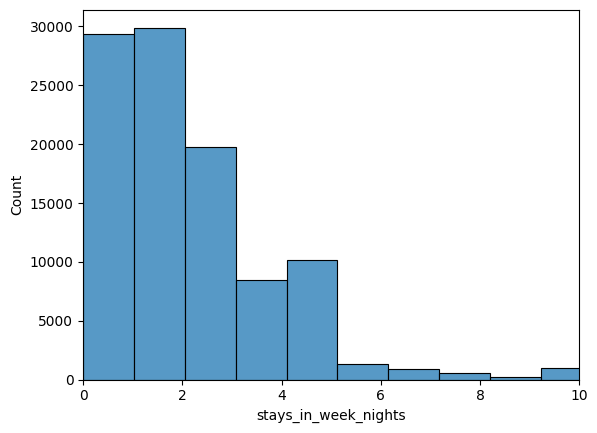

In [14]:
# histogram for lead time (Number of days that elapsed between the entering date of the booking and the arrival date)
sns.histplot(x='lead_time', bins=12, data=bookings)
plt.show()

# histogram for stays
sns.histplot(x='stays_in_weekend_nights', bins=16, data=bookings)
plt.xlim(0, 8)
plt.show()

# histogram for stays
sns.histplot(x='stays_in_week_nights', bins=40, data=bookings)
plt.xlim(0, 10)
plt.show()

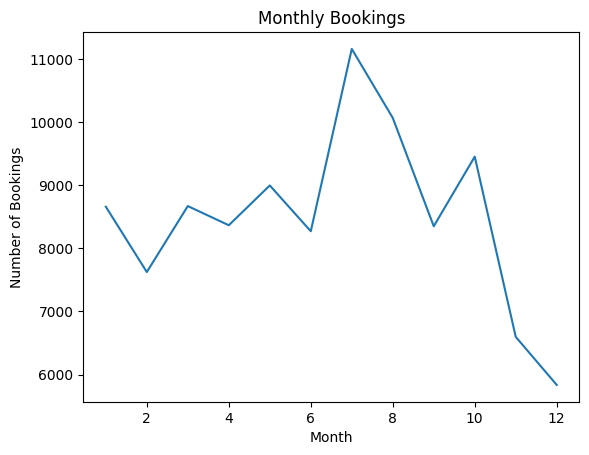

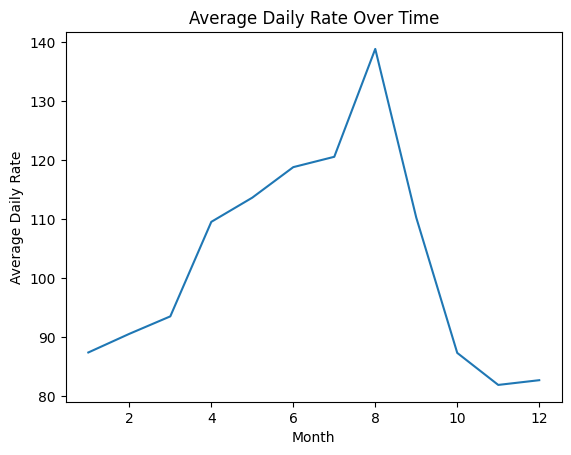

In [15]:
# line plot for monthly bookings
monthly_bookings = bookings.groupby('reservation_month')['hotel'].count()
sns.lineplot(x=monthly_bookings.index, y=monthly_bookings.values)
plt.title('Monthly Bookings')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.show()

# line plot for average daily rate over time (the measure of the average paid for rooms sold in a given time period)
average_daily_rate = bookings.groupby('reservation_month')['adr'].mean()
sns.lineplot(x=average_daily_rate.index, y=average_daily_rate.values)
plt.title('Average Daily Rate Over Time')
plt.xlabel('Month')
plt.ylabel('Average Daily Rate')
plt.show()

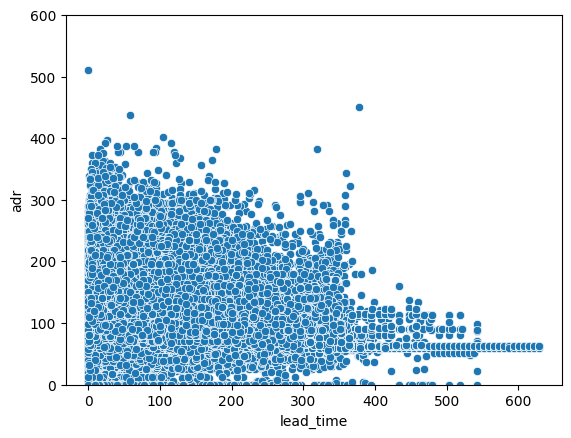

In [16]:
# scatter plot for lead time vs average daily rate
sns.scatterplot(x='lead_time', y='adr', data=bookings)
plt.ylim(0, 600)
plt.show()

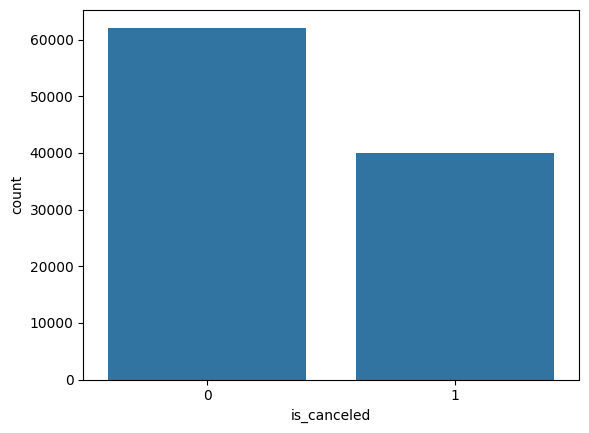

In [17]:
# bar plot for cancellation status (Value indicating if the booking was canceled (1) or not (0))
sns.countplot(x='is_canceled', data=bookings)
plt.show()

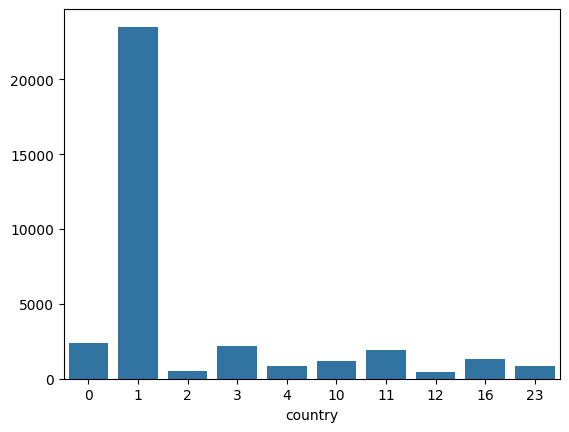

In [18]:
# bar plot 10 countries with highest cancellations ('GBR', 0)('PRT', 1)('USA', 2)('ESP', 3)('IRL', 4)('DEU', 10)('FRA', 11)('BEL', 12)('ITA', 16)('BRA', 23)
top_cancellations = bookings[bookings['is_canceled'] == 1]['country'].value_counts().head(10)
sns.barplot(x=top_cancellations.index, y=top_cancellations.values)
plt.show()

In [19]:
# export new data frame
bookings.to_csv('hotel_bookings_cleaned.csv', index=False)

# download csv
from google.colab import files
files.download('hotel_bookings_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>